# Глубинное обучение 1 / Введение в глубинное обучение, ФКН ВШЭ

## Домашнее задание 1. Часть 2: полносвязные нейронные сети.

### Общая информация

Оценка после штрафа после мягкого дедлайна вычисляется по формуле $M_{\text{penalty}} = M_{\text{full}} \cdot 0.85^{t/1440}$, где $M_{\text{full}}$ — полная оценка за работу без учета штрафа, а $t$ — время в минутах, прошедшее после мягкого дедлайна (округление до двух цифр после запятой). Таким образом, спустя первые сутки после мягкого дедлайна вы не можете получить оценку выше 8.5, а если сдать через четыре дня после мягкого дедлайна, то ваш максимум — 5.22 балла.

### Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этой части мы будем использовать фреймворк для обучения нейронный сетей, который вы реализовали в первой половине задания. А именно, вам предстоит обучить полносвязную нейронную сеть для предсказания года выпуска песни по ее аудио-признакам. Для этого мы будем использовать [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html). Если по какой-то причине вы не сделали первую половину домашки, то **можете поставить все эксперименты на PyTorch**, но рекомендуется использовать ваши реализации модулей.

In [ ]:
import modules as mm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from IPython.display import clear_output
import gc

plt.rcParams.update({'font.size': 16})
sns.set_style('whitegrid')
np.random.seed(0xFA1AFE1)

Начнем с того, что скачаем и загрузим данные:

In [ ]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2023-10-28 11:45:31--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.txt.zip’

data.txt.zip            [            <=>     ] 201.24M  47.4MB/s    in 4.8s    

2023-10-28 11:45:36 (41.5 MB/s) - ‘data.txt.zip’ saved [211011981]



In [ ]:
df = pd.read_csv('data.txt.zip', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


Посмотрим на статистики по данным.

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


Целевая переменная, год выпуска песни, записана в первом столбце. Посмотрим на ее распределение.

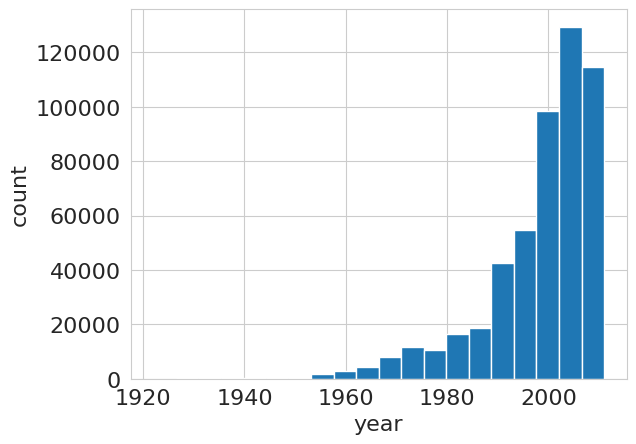

Range: 1922 - 2011
Unique values: 89


In [ ]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel('year')
plt.ylabel('count')
plt.show()
print(f'Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}')
print(f'Unique values: {np.unique(df.iloc[:, 0]).size}')

Разобьем данные на обучение и тест (не меняйте здесь ничего, чтобы сплит был одинаковым у всех).

In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

**Задание 0 (0 баллов, но при невыполнении максимальная оценка за всю работу &mdash; 0 баллов).** Мы будем использовать MSE как метрику качества. Прежде чем обучать нейронные сети, нам нужно проверить несколько простых бейзлайнов, чтобы было с чем сравнить более сложные алгоритмы. Для этого бучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Константное предсказание:

In [ ]:
const_pred = np.mean(y_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, np.repeat(const_pred, y_train.shape[0])))
print("Test RMSE = %.4f" % mean_squared_error(y_test, np.repeat(const_pred, y_test.shape[0])))

Train RMSE = 120.1088
Test RMSE = 117.6258


Ridge регрессия

In [ ]:
column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), np.arange(X_train.shape[1]))
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("Ridge Train RMSE = %.4f" % mean_squared_error(y_train, train_pred))
print("Ridge Test RMSE = %.4f" % mean_squared_error(y_test, test_pred))

Ridge Train RMSE = 91.6651
Ridge Test RMSE = 89.7497


Теперь приступим к экспериментам с нейросетями. Для начала отделим от данных валидацию:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0xE2E4)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

## Глава I. Заводим нейронную сеть (5 баллов)

**Задание 1.1 (0.5 баллов).** Заполните пропуски в функции `train_and_validate`. Она поможет нам запускать эксперименты.

In [ ]:
def plot_losses(train_losses, train_metrics, val_losses, val_metrics):
    """
    Plot losses and metrics while training
      - train_losses: sequence of train losses
      - train_metrics: sequence of train MSE values
      - val_losses: sequence of validation losses
      - val_metrics: sequence of validation MSE values
    """
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label='val')
    axs[1].plot(range(1, len(train_metrics) + 1), train_metrics, label='train')
    axs[1].plot(range(1, len(val_metrics) + 1), val_metrics, label='val')

    if max(train_losses) / min(train_losses) > 10:
        axs[0].set_yscale('log')

    if max(train_metrics) / min(train_metrics) > 10:
        axs[0].set_yscale('log')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    axs[0].set_ylabel('loss')
    axs[1].set_ylabel('MSE')
    plt.show()


def train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader,
                       num_epochs, verbose=True):
    """
    Train and validate neural network
      - model: neural network (mm.Module) to train
      - optimizer: optimizer (mm.Optimizer) chained to a model
      - criterion: loss function class (mm.Criterion)
      - metrics: function to measure MSE taking neural networks predictions
                 and ground truth labels
      - train_loader: mm.DataLoader with train set
      - val_loader: mm.DataLoader with validation set
      - num_epochs: number of epochs to train
      - verbose: whether to plot metrics during training
    Returns:
      - train_mse: training MSE over the last epoch
      - val_mse: validation MSE after the last epoch
    """
    train_losses, val_losses = [], []
    train_metrics, val_metrics = [], []

    for epoch in range(1, num_epochs + 1):
        gc.collect()
        model.train()
        running_loss, running_metric = 0, 0
        pbar = tqdm(train_loader, desc=f'Training {epoch}/{num_epochs}') \
            if verbose else train_loader

        for X_batch, y_batch in pbar:
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            model.backward(X_batch, criterion.backward(predictions, y_batch))
            optimizer.step()

            metric_value = metric(predictions, y_batch)
            running_loss += loss * X_batch.shape[0]
            running_metric += metric_value * X_batch.shape[0]
            if verbose:
                pbar.set_postfix({'loss': loss, 'MSE': metric_value})
            del X_batch, y_batch, metric_value, predictions, loss


        train_losses += [running_loss / train_loader.num_samples()]
        train_metrics += [running_metric / train_loader.num_samples()]
        del running_loss, running_metric

        model.eval()
        running_loss, running_metric = 0, 0
        pbar = tqdm(val_loader, desc=f'Validating {epoch}/{num_epochs}') \
            if verbose else val_loader

        for X_batch, y_batch in pbar:
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            model.backward(X_batch, criterion.backward(predictions, y_batch))
            optimizer.step()

            metric_value = metric(predictions, y_batch)
            running_loss += loss * X_batch.shape[0]
            running_metric += metric_value * X_batch.shape[0]
            if verbose:
                pbar.set_postfix({'loss': loss, 'MSE': metric_value})
            del X_batch, y_batch, metric_value, predictions, loss

        val_losses += [running_loss / val_loader.num_samples()]
        val_metrics += [running_metric / val_loader.num_samples()]
        del running_loss, running_metric

        if verbose:
            plot_losses(train_losses, train_metrics, val_losses, val_metrics)

    if verbose:
        print(f'Validation MSE: {val_metrics[-1]:.3f}')

    return train_metrics[-1], val_metrics[-1]

**Задание 1.2 (0.75 балла).** Попробуем обучить нашу первую нейронную сеть. Здесь целевая переменная дискретная &mdash; это год выпуска песни. Поэтому будем учить сеть на классификацию.

- В качестве архитектуры сети возьмите два линейных слоя с активацией ReLU между ними c числом скрытых нейронов, равным 128.
- Используйте SGD с `lr=1e-3`.
- Возьмите размер мини-батча около 32-64, примерно 3-4 эпох обучения должно быть достаточно.
- Также преобразуйте целевую переменную так, чтобы ее значения принимали значения от $0$ до $C-1$, где $C$ &mdash; число классов (лучше передайте преобразованное значение в DataLoader, исходное нам еще пригодится)
- В качестве параметра `metric` в `train_and_validate` передайте lambda-выражение, которое считает MSE по выходу нейронной сети и целевой переменной. В случае классификации предсказывается класс с наибольшей вероятностью (или, что то же самое, с наибольшим значением логита).

In [ ]:
hidden_size = 128

model = mm.Sequential(
    mm.Linear(X_train.shape[1], hidden_size),
    mm.ReLU(),
    mm.Linear(hidden_size, np.max(y_train) - np.min(y_train) + 1)
)

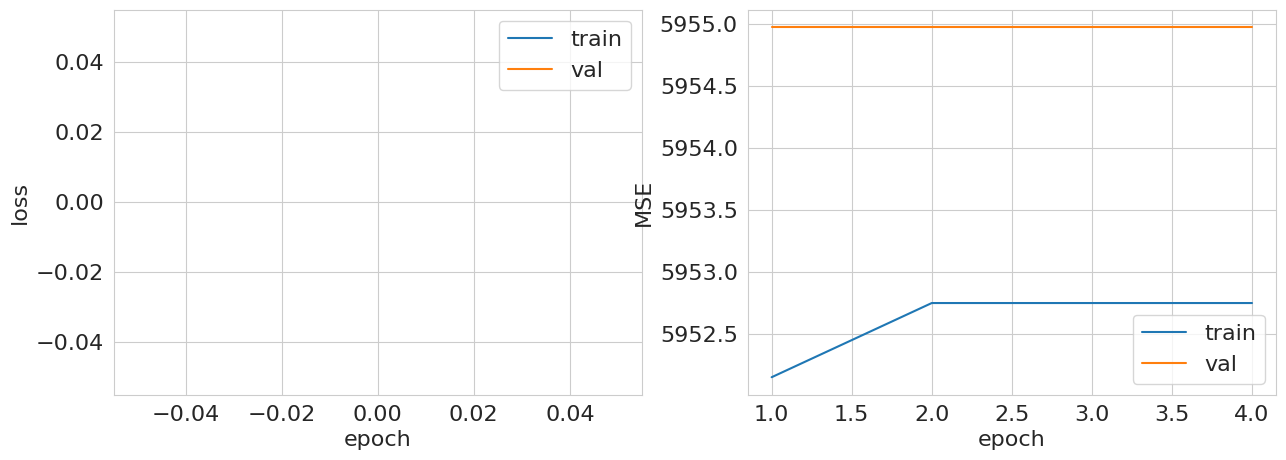

Validation MSE: 5954.972


(5952.749721437417, 5954.972047150382)

In [ ]:
train_and_validate(model=model,
                   optimizer=mm.SGD(model, lr=1e-3),
                   criterion=mm.CrossEntropyLoss(),
                   metric=lambda x, y: mean_squared_error(np.argmax(x, axis=1), y),
                   train_loader=mm.DataLoader(X_train, y_train - np.min(y_train), batch_size=32, shuffle=True),
                   val_loader=mm.DataLoader(X_val, y_val - np.min(y_train), batch_size=32, shuffle=False),
                   num_epochs=4)

**Задание 1.3 (0.5 балла).** Прокомментируйте ваши наблюдения. Удалось ли побить бейзлайн? Как вы думаете, хорошая ли идея учить классификатор для этой задачи? Почему?

**Ответ:** Получилось совершенно ужасное качество. Выглядит как будто наша модель не учиться, а совершает какие-то рандомные телодвижения. Бейзлайн побить не удалось. Думаю учить классификатор в данной задаче не самая лучшая идея, потому что:

1. Распределение данных по классом далеко от равномерного.
2. Явно песни 2000 и 2001 года более похожи, чем 2000 и 1950, ведь музыка развивалась постепенно. Поэтому штрафовать за такие различия по разному, чего в задаче классификации достичь не получается.

**Задание 1.4 (0.75 балла).** Теперь попробуем решать задачу как регрессию. Обучите нейронную сеть на MSE.

- Используйте такие же гиперпараметры обучения.
- Когда передаете целевую переменную в DataLoader, сделайте reshape в (-1, 1).
- Не забудьте изменить lambda-выражение, которые вы передаете в `train_and_validate`.
- Если что-то пойдет не так, можете попробовать меньшие значения `lr`.

In [ ]:
model = mm.Sequential(
    mm.Linear(X_train.shape[1], hidden_size),
    mm.ReLU(),
    mm.Linear(hidden_size, 1)
)

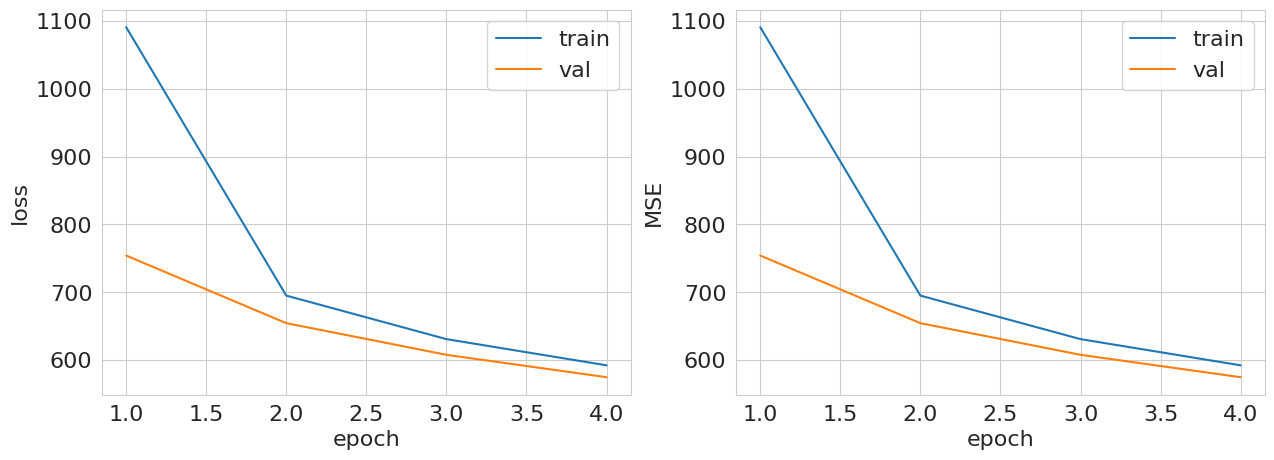

Validation MSE: 574.707


(592.2484226677512, 574.706609914321)

In [ ]:
train_and_validate(model=model,
                   optimizer=mm.SGD(model, lr=1e-8),
                   criterion=mm.MSELoss(),
                   metric=lambda x, y: mean_squared_error(x, y),
                   train_loader=mm.DataLoader(X_train, (y_train - np.min(y_train)).reshape(-1, 1), batch_size=32, shuffle=True),
                   val_loader=mm.DataLoader(X_val, (y_val - np.min(y_train)).reshape(-1, 1), batch_size=32, shuffle=False),
                   num_epochs=4)

**Задание 1.5 (0.5 балла).** Получилось ли у вас стабилизировать обучение? Помогли ли меньшие значения `lr`? Стало ли лучше от замены классификации на регрессию? Как вы думаете, почему так происходит? В качестве подсказки можете посмотреть на распределение целевой переменной и магнитуду значений признаков.

**Ответ:** Да, модель начала учиться, это отлично видно по графикам. Уменьшение lr помогло. Переход к задаче регрессии помог, как мне кажется, это произошло потому, что регрессия неплохо решает две обе проблемы, с которыми мы столкнулись анализирую подход к данной задаче как к задаче классификации.

**Задание 1.6 (0.75 балла).** Начнем с того, что попробуем отнормировать целевую переменную. Для этого воспользуемся min-max нормализацией, чтобы целевая переменная принимала значения от 0 до 1. Реализуйте функции `normalize` и `denormalize`, которые, соответственно, нормируют целевую переменную и применяют обратное преобразование. Минимум и максимум оцените по обучающей выборке (то есть эти константы должны быть фиксированными и не зависеть от передаваемой выборки).

In [ ]:
minim = np.min(y_train)
maxim = np.max(y_train)

def normalize(sample):
    """
    Min-max normalization to convert sample to [0, 1] range
    """
    return (sample - minim) / (maxim - minim)

def denormalize(sample):
    """
    Denormalize sample from [0, 1] to initial range
    """
    return sample * (maxim - minim) + minim

Теперь повторите эксперимент из **задания 1.4**, обучаясь на нормированной целевой переменной. Сделаем также еще одно изменение: добавим сигмоидную активацию после последнего линейного слоя сети. Таким образом мы гарантируем, что нейронная сеть предсказывает числа из промежутка $[0, 1]$. Использование активации - довольно распространенный прием, когда мы хотим получить числа из определенного диапазона значений.

In [ ]:
model = mm.Sequential(
    mm.Linear(X_train.shape[1], hidden_size),
    mm.ReLU(),
    mm.Linear(hidden_size, 1),
    mm.Sigmoid()
)

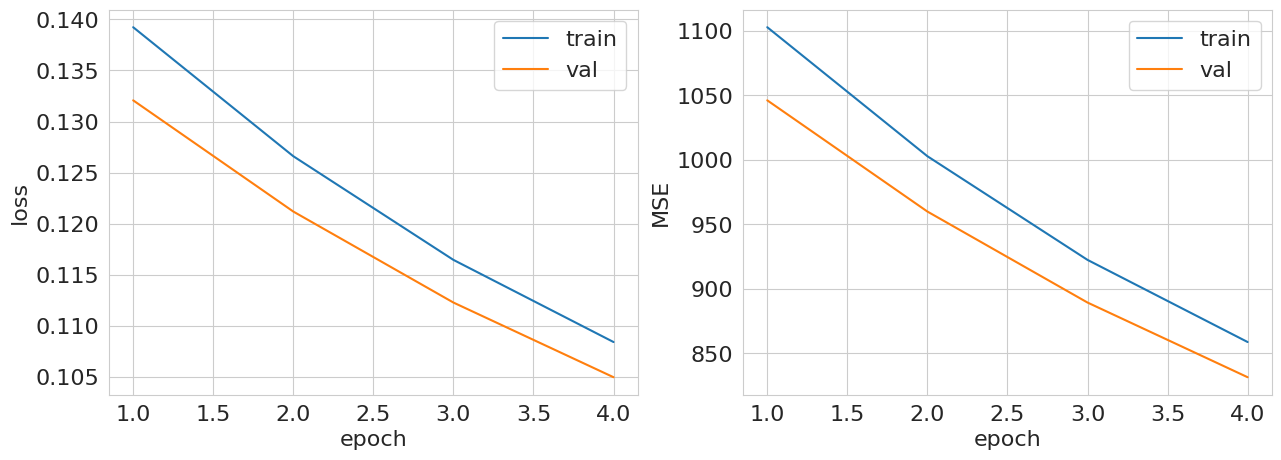

Validation MSE: 831.568


(858.8454386361456, 831.5681034666297)

In [ ]:
train_and_validate(model=model,
                   optimizer=mm.SGD(model, lr=1e-8),
                   criterion=mm.MSELoss(),
                   metric=lambda x, y: mean_squared_error(denormalize(x), denormalize(y)),
                   train_loader=mm.DataLoader(X_train, (normalize(y_train)).reshape((-1, 1)), batch_size=32, shuffle=True),
                   val_loader=mm.DataLoader(X_val, (normalize(y_val)).reshape((-1, 1)), batch_size=32, shuffle=False),
                   num_epochs=4)

**Задание 1.7 (0.5 балла).** Сравните результаты этого эксперимента с предыдущим запуском.

**Ответ:** Стало похуже, но я думаю тут это не критично. Главное, что наша модель учится. К сожаленю уча без гпу очень сложно нормально эксперементировать с разными гиперпараметрами. Возможно lr=1e-8 был оптимален для случая, где мы вычитали минимальное значение, а для этого случая можно найти другое, лучшее значение. Тем не менее еще раз отмечу: главное что у нас получается учить нашу модель и по наклону ошибки виден потенциал.

**Задание 1.8 (0.75 балла).** На этот раз попробуем отнормировать не только целевую переменную, но и сами данные, которые подаются сети на вход. Для них будем использовать нормализацию через среднее и стандартное отклонение. Преобразуйте данные и повторите прошлый эксперимент. Скорее всего, имеет смысл увеличить число эпох обучения.

In [ ]:
ss = StandardScaler()
model = mm.Sequential(
    mm.Linear(X_train.shape[1], hidden_size),
    mm.ReLU(),
    mm.Linear(hidden_size, 1),
    mm.Sigmoid()
)

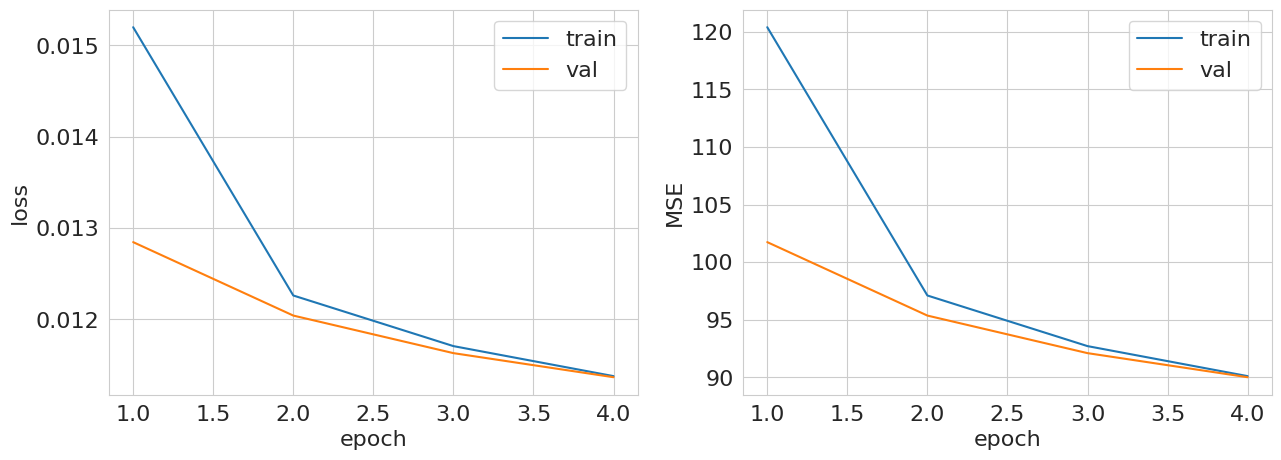

Validation MSE: 90.021


(90.11621890333332, 90.02110237550784)

In [ ]:
train_and_validate(model=model,
                   optimizer=mm.SGD(model, lr=1e-2),
                   criterion=mm.MSELoss(),
                   metric=lambda x, y: mean_squared_error(denormalize(x), denormalize(y)),
                   train_loader=mm.DataLoader(ss.fit_transform(X_train), (normalize(y_train)).reshape((-1, 1)), batch_size=32, shuffle=True),
                   val_loader=mm.DataLoader(ss.transform(X_val), (normalize(y_val)).reshape((-1, 1)), batch_size=32, shuffle=False),
                   num_epochs=4)

Если вы все сделали правильно, то у вас должно было получиться качество, сравнимое с `Ridge` регрессией.

**Мораль:** как видите, нам пришлось сделать очень много хитрых телодвижений, чтобы нейронная сеть работала хотя бы так же, как и простая линейная модель. Здесь, конечно, показан совсем экстремальный случай, когда без нормализации данных нейронная сеть просто не учится. Как правило, в реальности завести нейронную сеть из коробки не очень сложно, но вот заставить ее работать на полную &mdash; куда более трудоемкая задача. Написание пайплайнов обучения нейросетевых моделей требует большой аккуратности, а дебаг часто превращается в угадайку. К счастью, очень часто на помощь приходит интуиция, и мы надеемся, что вы сможете выработать ее в течение нашего курса. Начнем с двух советов, которые стоит принять на вооружение:

- Обязательно начинаем любые эксперименты с бейзлайнов: без них мы бы не поняли, что нейронная сеть не учится в принципе.
- При постановке эксперментов старайтесь делать минимальное количество изменений за раз (в идеале одно!): только так можно понять, какие конкретно изменения влияют на результат.

## Часть 2. Улучшаем нейронную сеть

Продолжим экспериментировать с нейронной сетью, чтобы добиться еще лучшего качества. В заданиях 2.1-2.3 **запускайте эксперименты несколько раз (4-5)** с одинаковыми значениями гиперпараметров обучения, но с разными случайными инициализациями сети (достаточно просто прогнать код с инициализацией модели и ее обучением в цикле: каждый вызов конструктора инициализирует модель случайно). Для сравнения качества разных экспериментов **отрисовывайте ящики с усами (boxplot)** по этим нескольким запускам.

Задание 2.4 требует перебора гиперпараметров, в нем запускайте эксперимент по одному разу для каждого рассмотренного значения, чтобы сэкономить время.

**Задание 2.1 (1 балл).** Давайте попробуем другие оптимизаторы. Обучите нейросеть с помощью SGD+momentum и Adam. Опишите свои наблюдения и в дальнейших запусках используйте лучший оптимизатор. Для Adam обычно берут learning rate поменьше, в районе $10^{-3}$.

In [ ]:
def two_boxes(box_train: list, box_val: list, name: str) -> None:
  '''
  plot boxplots for training results
  '''
  t, ax = plt.subplots(1, 2, figsize=(10, 6))
  t.suptitle(name)
  ax[0].set_title('train')
  ax[1].set_title('val')
  sns.boxplot(box_train, ax=ax[0])
  sns.boxplot(box_val, ax=ax[1])
  plt.show()

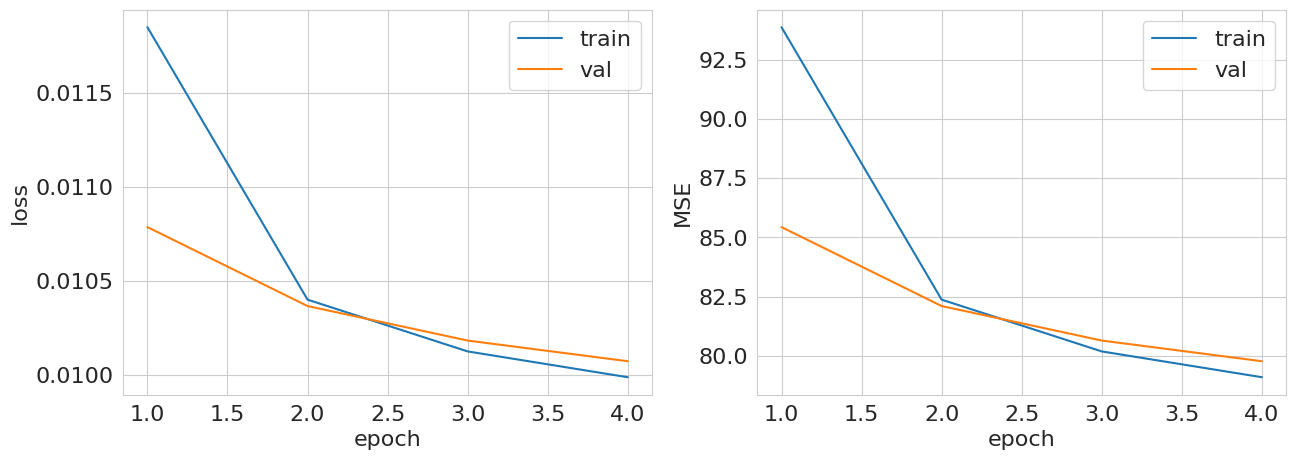

Validation MSE: 79.774


In [ ]:
box_train, box_val = [], []
hidden_size = 128
for i in range(3):
  gc.collect()
  ss = StandardScaler()
  model = mm.Sequential(
      mm.Linear(X_train.shape[1], hidden_size),
      mm.ReLU(),
      mm.Linear(hidden_size, 1),
      mm.Sigmoid()
  )

  train_res, val_res = train_and_validate(model=model,
            optimizer=mm.SGD(model, lr=1e-2, momentum=0.9),
            criterion=mm.MSELoss(),
            metric=lambda x, y: mean_squared_error(denormalize(x), denormalize(y)),
            train_loader=mm.DataLoader(ss.fit_transform(X_train), (normalize(y_train)).reshape((-1, 1)), batch_size=32, shuffle=True),
            val_loader=mm.DataLoader(ss.transform(X_val), (normalize(y_val)).reshape((-1, 1)), batch_size=32, shuffle=False),
            num_epochs=4)

  box_train.append(train_res)
  box_val.append(val_res)

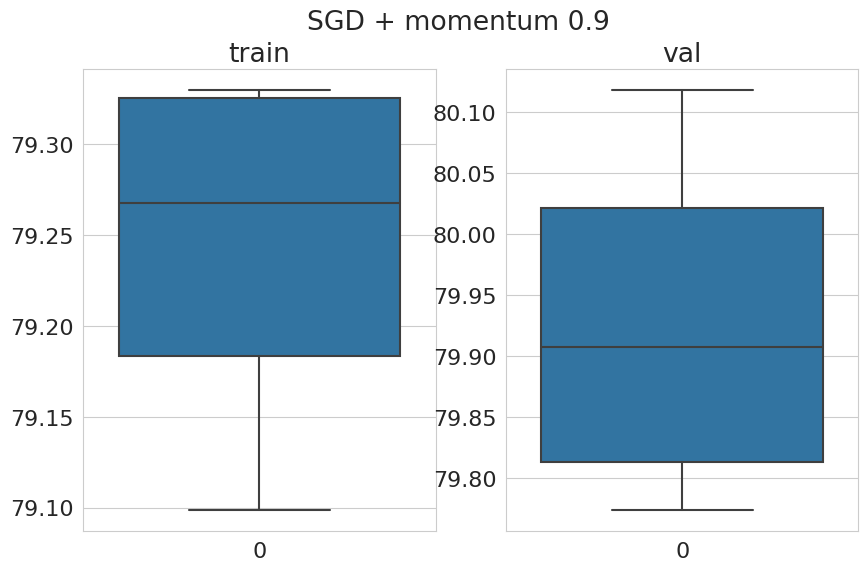

In [ ]:
two_boxes(box_train, box_val, name='SGD + momentum 0.9')

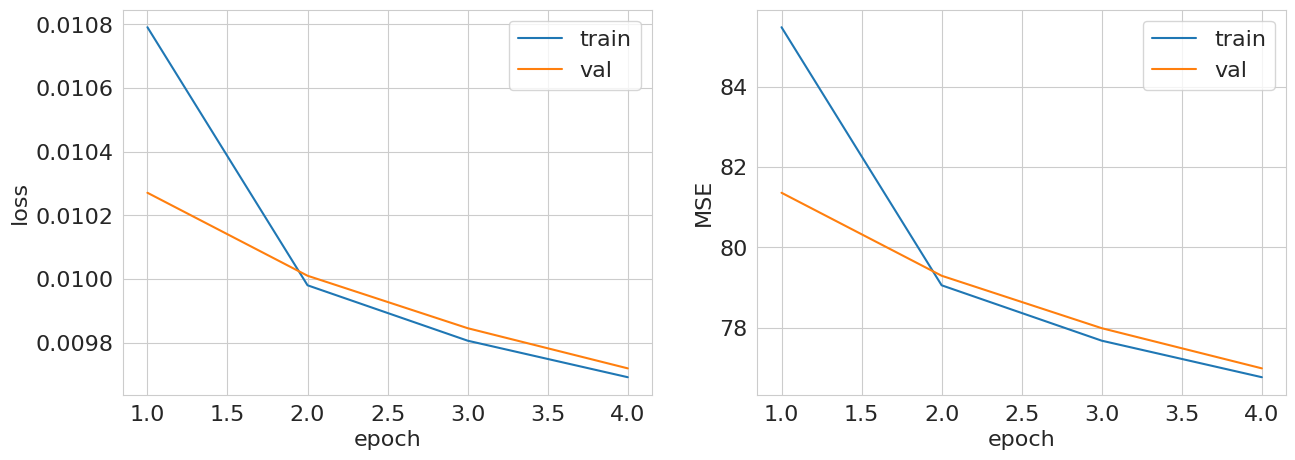

Validation MSE: 76.989


In [ ]:
box_train, box_val = [], []
for i in range(3):
  gc.collect()
  ss = StandardScaler()
  model = mm.Sequential(
      mm.Linear(X_train.shape[1], hidden_size),
      mm.ReLU(),
      mm.Linear(hidden_size, 1),
      mm.Sigmoid()
  )

  train_res, val_res = train_and_validate(model=model,
            optimizer=mm.Adam(model, lr=1e-3),
            criterion=mm.MSELoss(),
            metric=lambda x, y: mean_squared_error(denormalize(x), denormalize(y)),
            train_loader=mm.DataLoader(ss.fit_transform(X_train), (normalize(y_train)).reshape((-1, 1)), batch_size=32, shuffle=True),
            val_loader=mm.DataLoader(ss.transform(X_val), (normalize(y_val)).reshape((-1, 1)), batch_size=32, shuffle=False),
            num_epochs=4)

  box_train.append(train_res)
  box_val.append(val_res)

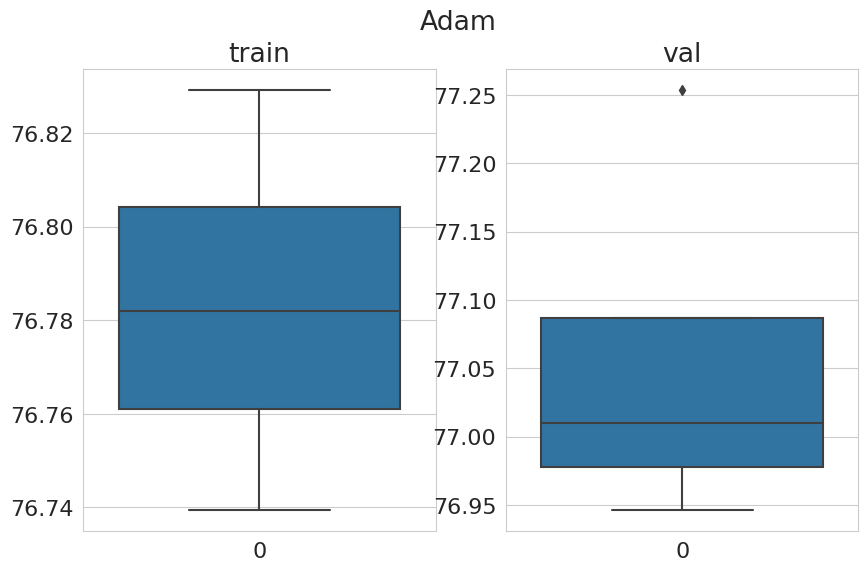

In [ ]:
two_boxes(box_train, box_val, name='Adam')

Видим, что Adam показал лучшее качество (77 против 80), поэтому дальше будем работать с ним.


**Задание 2.2 (1 балл).** Теперь сделаем нашу нейронную сеть более сложной. Попробуйте сделать сеть:

- более широкой (то есть увеличить размерность скрытого слоя, например, вдвое)
- более глубокой (то есть добавить еще один скрытый слой)

Опишите, как увеличение числа параметров модели влияет на качество на обучающей и валидационной выборках.

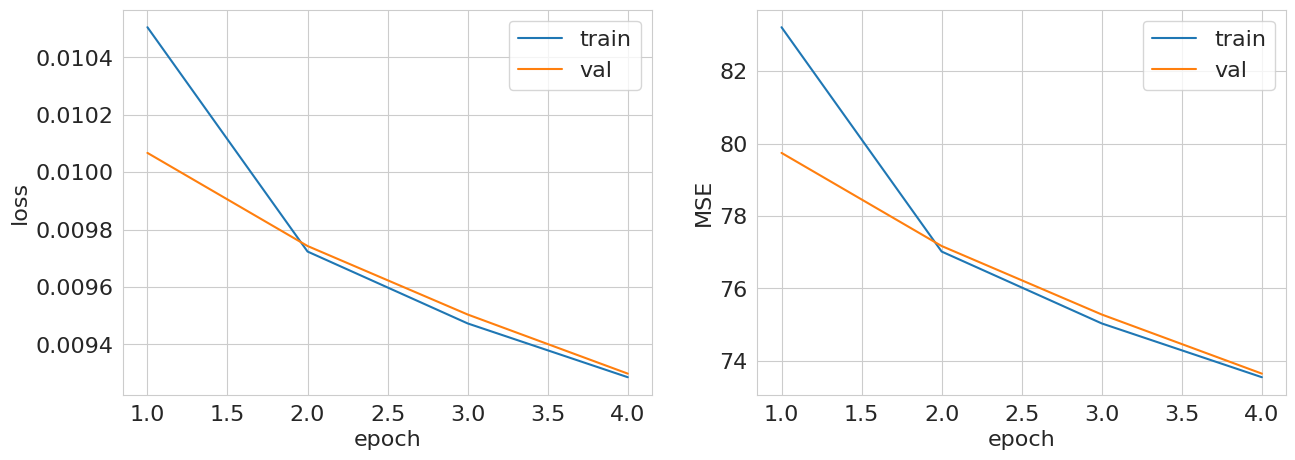

Validation MSE: 73.649


In [ ]:
box_train, box_val = [], []
hidden_size = 128 * 2
for i in range(3):
  gc.collect()
  ss = StandardScaler()

  train_res, val_res = train_and_validate(model=(model := mm.Sequential(
                mm.Linear(X_train.shape[1], hidden_size),
                mm.ReLU(),
                mm.Linear(hidden_size, hidden_size),
                mm.ReLU(),
                mm.Linear(hidden_size, 1),
                mm.Sigmoid()
            )),
            optimizer=mm.Adam(model, lr=1e-3),
            criterion=mm.MSELoss(),
            metric=lambda x, y: mean_squared_error(denormalize(x), denormalize(y)),
            train_loader=mm.DataLoader(ss.fit_transform(X_train), (normalize(y_train)).reshape((-1, 1)), batch_size=32, shuffle=True),
            val_loader=mm.DataLoader(ss.transform(X_val), (normalize(y_val)).reshape((-1, 1)), batch_size=32, shuffle=False),
            num_epochs=4)

  del model

  box_train.append(train_res)
  box_val.append(val_res)

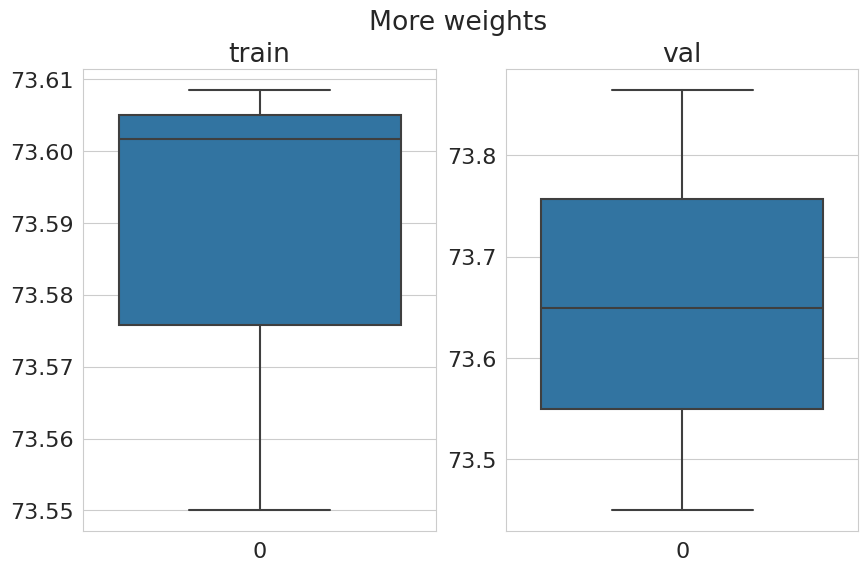

In [ ]:
two_boxes(box_train, box_val, name='More weights')

**Задание 2.3 (1 балл).** Как вы должны были заметить, более сложная модель стала сильнее переобучаться. Попробуем разные методы регуляризации, чтобы бороться с переобучением. Проведите два эксперимента:

- Добавьте слой дропаута с параметром $p=0.2$ после каждого линейного слоя, кроме последнего.
- Попробуйте batch-нормализацию вместо дропаута. Строго говоря, batch-нормализация не является методом регуляризации, но никто не запрещает нам экспериментировать с ней.

Опишите результаты экспериментов.

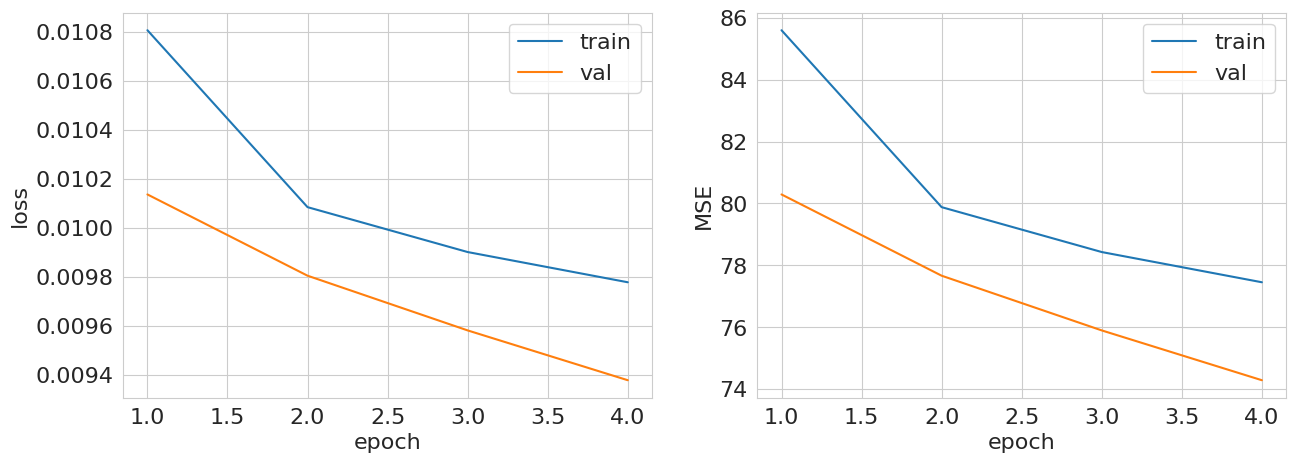

Validation MSE: 74.289


In [ ]:
box_train, box_val = [], []
hidden_size = 128 * 2
for i in range(3):
  gc.collect()
  ss = StandardScaler()

  train_res, val_res = train_and_validate(model=(model := mm.Sequential(
                mm.Linear(X_train.shape[1], hidden_size),
                mm.Dropout(p=0.2),
                mm.ReLU(),
                mm.Linear(hidden_size, hidden_size),
                mm.Dropout(p=0.2),
                mm.ReLU(),
                mm.Linear(hidden_size, 1),
                mm.Sigmoid()
            )),
            optimizer=mm.Adam(model, lr=1e-3),
            criterion=mm.MSELoss(),
            metric=lambda x, y: mean_squared_error(denormalize(x), denormalize(y)),
            train_loader=mm.DataLoader(ss.fit_transform(X_train), (normalize(y_train)).reshape((-1, 1)), batch_size=32, shuffle=True),
            val_loader=mm.DataLoader(ss.transform(X_val), (normalize(y_val)).reshape((-1, 1)), batch_size=32, shuffle=False),
            num_epochs=4)

  box_train.append(train_res)
  box_val.append(val_res)

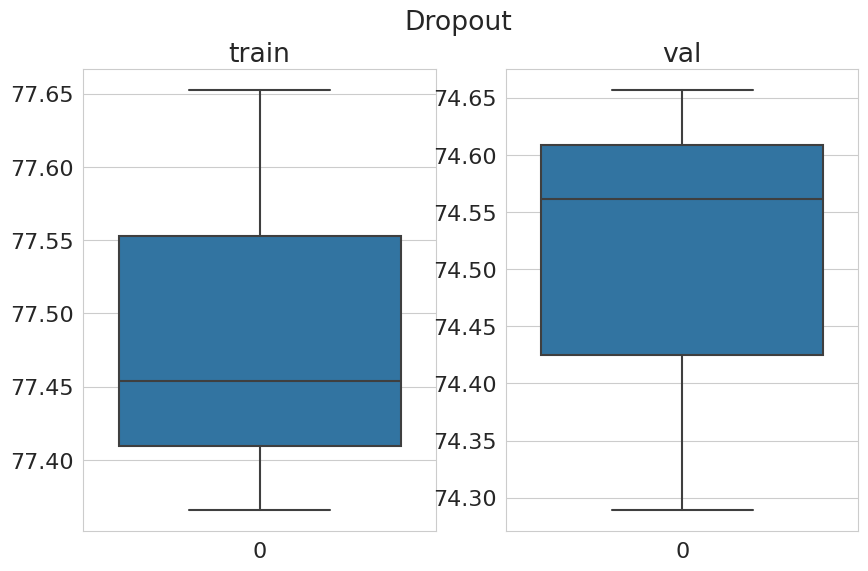

In [ ]:
two_boxes(box_train, box_val, name='Dropout')

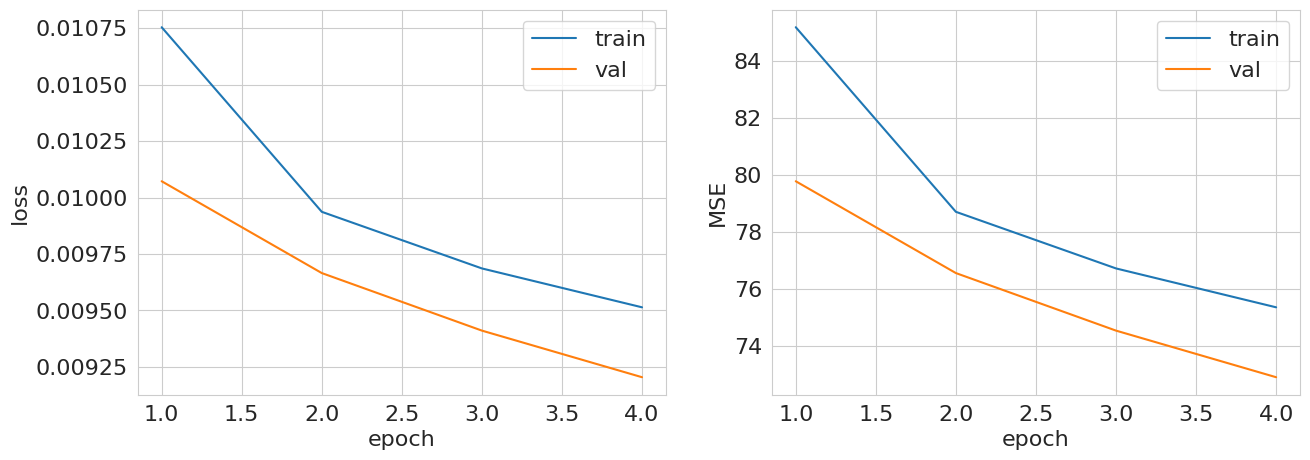

Validation MSE: 72.906


In [ ]:
box_train, box_val = [], []
hidden_size = 128 * 2
for i in range(3):
  gc.collect()
  ss = StandardScaler()

  train_res, val_res = train_and_validate(model=(model := mm.Sequential(
                mm.Linear(X_train.shape[1], hidden_size),
                mm.BatchNormalization(num_features=hidden_size),
                mm.ReLU(),
                mm.Linear(hidden_size, hidden_size),
                mm.BatchNormalization(num_features=hidden_size),
                mm.ReLU(),
                mm.Linear(hidden_size, 1),
                mm.Sigmoid()
            )),
            optimizer=mm.Adam(model, lr=1e-3),
            criterion=mm.MSELoss(),
            metric=lambda x, y: mean_squared_error(denormalize(x), denormalize(y)),
            train_loader=mm.DataLoader(ss.fit_transform(X_train), (normalize(y_train)).reshape((-1, 1)), batch_size=32, shuffle=True),
            val_loader=mm.DataLoader(ss.transform(X_val), (normalize(y_val)).reshape((-1, 1)), batch_size=32, shuffle=False),
            num_epochs=4)

  box_train.append(train_res)
  box_val.append(val_res)

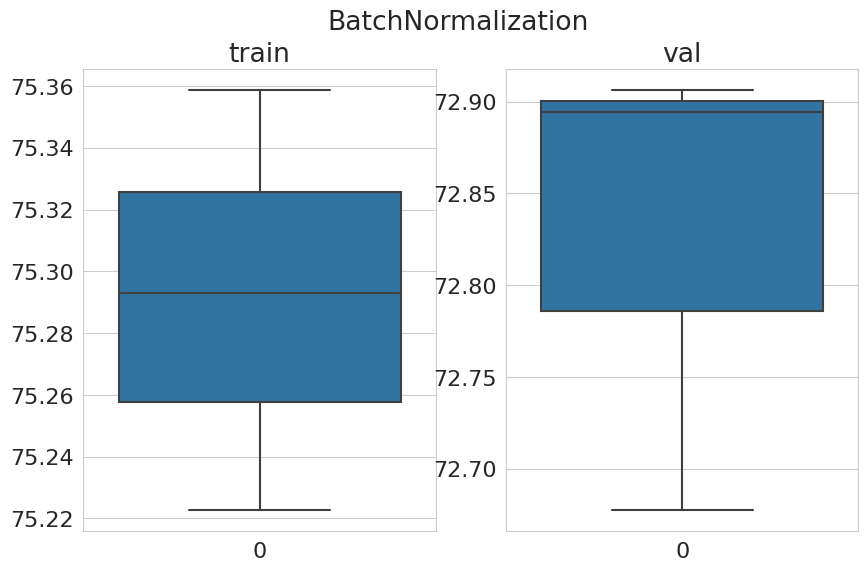

In [ ]:
two_boxes(box_train, box_val, name='BatchNormalization')

**Результаты**:

1. В обеих случаях результат на трейне хуже чем на тесте. Это означает, что модели не удается подстроиться под тренировоные данные. Значит оба способа подоходят для регуляризиции.
2. Использую батч норму удалось достичь лучшего результата, поэтому далее будем использовать ее.

**Задание 2.4 (1.5 балла).** Теперь, когда мы определились с выбором архитектуры нейронной сети, пора заняться рутиной DL-инженера &mdash; перебором гиперпараметров. Подберите оптимальное значение lr по значению MSE на валидации (по логарифмической сетке, достаточно посмотреть 3-4 значения), можете воспользоваться `verbose=False` в функции `train_and_validate`. Затем подберите оптимальное значение weight decay для данного lr (тоже по логарифмической сетке, типичные значения этого параметра лежат в диапазоне $[10^{-6}, 10^{-3}]$, но не забудьте включить нулевое значение в сетку). Постройте графики зависимости MSE на трейне и на валидации от значений параметров. Прокомментируйте получившиеся зависимости.

In [ ]:
lrs = np.logspace(-8, 0, 4)

scores = dict()
for lr in lrs:
  hidden_size = 128 * 2
  gc.collect()
  ss = StandardScaler()

  train_res, val_res = train_and_validate(model=(model := mm.Sequential(
                mm.Linear(X_train.shape[1], hidden_size),
                mm.BatchNormalization(num_features=hidden_size),
                mm.ReLU(),
                mm.Linear(hidden_size, hidden_size),
                mm.BatchNormalization(num_features=hidden_size),
                mm.ReLU(),
                mm.Linear(hidden_size, 1),
                mm.Sigmoid()
            )),
            optimizer=mm.Adam(model, lr=lr),
            criterion=mm.MSELoss(),
            metric=lambda x, y: mean_squared_error(denormalize(x), denormalize(y)),
            train_loader=mm.DataLoader(ss.fit_transform(X_train), (normalize(y_train)).reshape((-1, 1)), batch_size=32, shuffle=True),
            val_loader=mm.DataLoader(ss.transform(X_val), (normalize(y_val)).reshape((-1, 1)), batch_size=32, shuffle=False),
            num_epochs=4, verbose=False)


  scores[val_res] = lr

best_lr = next(iter({v: k for k, v in sorted(scores.items(), key=lambda item: item[0])}))

In [ ]:
weight_decays = np.hstack((np.logspace(-6, -3, 3), np.array([0])))

scores = dict()
for weight_decay in weight_decays:
  hidden_size = 128 * 2
  gc.collect()
  ss = StandardScaler()

  train_res, val_res = train_and_validate(model=(model := mm.Sequential(
                mm.Linear(X_train.shape[1], hidden_size),
                mm.BatchNormalization(num_features=hidden_size),
                mm.ReLU(),
                mm.Linear(hidden_size, hidden_size),
                mm.BatchNormalization(num_features=hidden_size),
                mm.ReLU(),
                mm.Linear(hidden_size, 1),
                mm.Sigmoid()
            )),
            optimizer=mm.Adam(model, lr=best_lr, weight_decay=weight_decay),
            criterion=mm.MSELoss(),
            metric=lambda x, y: mean_squared_error(denormalize(x), denormalize(y)),
            train_loader=mm.DataLoader(ss.fit_transform(X_train), (normalize(y_train)).reshape((-1, 1)), batch_size=32, shuffle=True),
            val_loader=mm.DataLoader(ss.transform(X_val), (normalize(y_val)).reshape((-1, 1)), batch_size=32, shuffle=False),
            num_epochs=4, verbose=False)


  scores[val_res] = weight_decay

best_weight_decay = next(iter({v: k for k, v in sorted(scores.items(), key=lambda item: item[0])}))

In [ ]:
best_lr, best_weight_decay

(0.002154434690031882, 0.0)

Как вы могли заметить, еще одна рутина DL-инженера &mdash; утомительное ожидание обучения моделей.

**Задание 2.5 (0.5 балла).** Мы провели большое число экспериментов и подобрали оптимальную архитектуру и гиперпараметры. Пришло время обучить модель на полной обучающей выборке, померять качество на тестовой выборке и сравнить с бейзлайнами. Проделайте это.

In [ ]:
X_train = np.vstack((X_train, X_val))
y_train = np.vstack((y_train.reshape((len(y_train), 1)), y_val.reshape((len(y_val), 1))))

In [ ]:
hidden_size = 128 * 2
gc.collect()
ss = StandardScaler()
box_train, box_test = [], []
for i in range(4):
  train_res, test_res = train_and_validate(model=(model := mm.Sequential(
                mm.Linear(X_train.shape[1], hidden_size),
                mm.BatchNormalization(num_features=hidden_size),
                mm.ReLU(),
                mm.Linear(hidden_size, hidden_size),
                mm.BatchNormalization(num_features=hidden_size),
                mm.ReLU(),
                mm.Linear(hidden_size, 1),
                mm.Sigmoid()
            )),
            optimizer=mm.Adam(model, lr=best_lr, weight_decay=weight_decay),
            criterion=mm.MSELoss(),
            metric=lambda x, y: mean_squared_error(denormalize(x), denormalize(y)),
            train_loader=mm.DataLoader(ss.fit_transform(X_train), (normalize(y_train)).reshape((-1, 1)), batch_size=32, shuffle=True),
            val_loader=mm.DataLoader(ss.transform(X_test), (normalize(y_test)).reshape((-1, 1)), batch_size=32, shuffle=False),
            num_epochs=4, verbose=False)

  box_test.append(test_res)
  box_train.append(train_res)


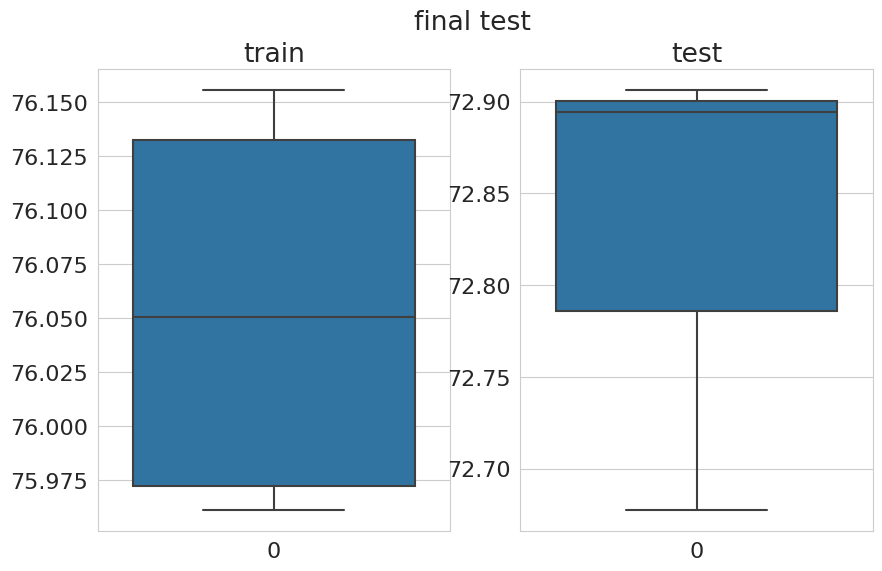

In [ ]:
t, ax = plt.subplots(1, 2, figsize=(10, 6))
t.suptitle('final test')
ax[0].set_title('train')
ax[1].set_title('test')
sns.boxplot(box_train, ax=ax[0])
sns.boxplot(box_val, ax=ax[1])
plt.show()

Юхууууу мы смогли получить качество гораздо лучше (72.8 против 89.7), чем на ридж регрессии. Как же приятно, когда модели учатся.